In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import main
from constants import *
from model import *
from preprocess import *
from train import *
from util import *
from classifier import *
import pandas as pd

In [2]:
markers, raw_mixes = get_markers_mixes(N_COL)
true_proportions = get_true_proportions()
x_train, x_test, prop_train, prop_test = preprocess_mixes(markers, raw_mixes, true_proportions)
model = AE(N_COL*K)
compile(model)

train(model, x_train, x_test, prop_train, prop_test)

2023-06-17 00:19:31.984520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [3]:
z_train = model.encoder(x_train)
z_test = model.encoder(x_test)

In [21]:
pca = PCA(n_components=3)
pca.fit(tf.concat([z_train, z_test], axis=0))
z_train_pca = pca.transform(z_train)
pc1_train, pc2_train, pc3_train = zip(*z_train_pca)

Text(0.5, 0.92, '3D PCA of latent space of training data')

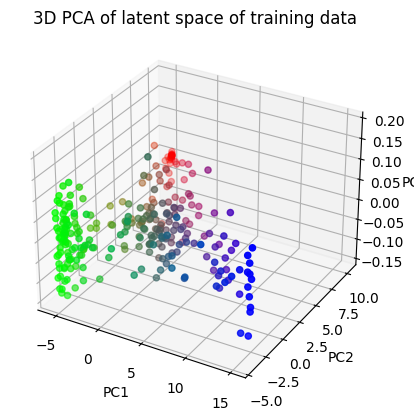

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1_train,pc2_train,pc3_train,c=prop_train.to_numpy())
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of latent space of training data")

Text(0.5, 1.0, 'PCA of latent space of training data')

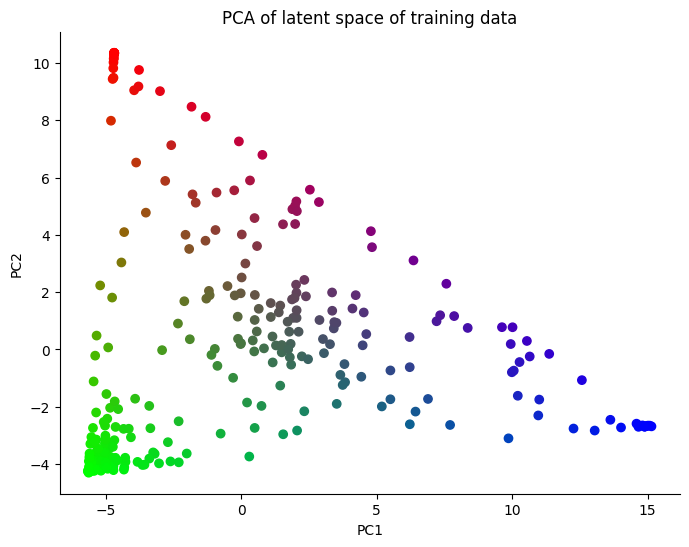

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(pc1_train,pc2_train,c=prop_train.to_numpy())
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("PCA of latent space of training data")

In [24]:
z_test_pca = pca.transform(z_test)
pc1_test, pc2_test, pc3_test = zip(*z_test_pca)

Text(0.5, 0.92, '3D PCA of latent space of test data')

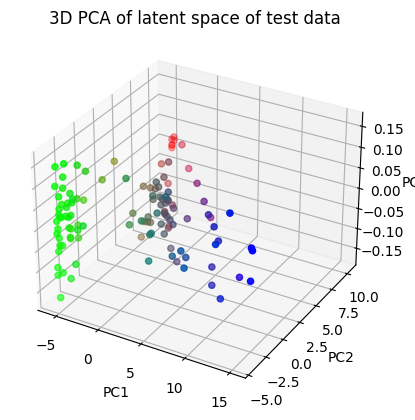

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1_test,pc2_test,pc3_test,c=prop_test.to_numpy())
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of latent space of test data")

Text(0.5, 1.0, 'PCA of latent space of test data')

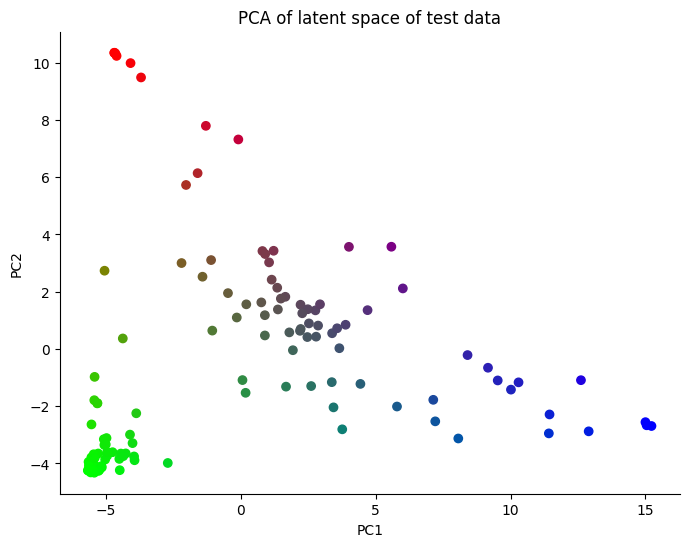

In [30]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(pc1_test,pc2_test,c=prop_test.to_numpy())
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("PCA of latent space of test data")